In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from pprint import pprint
import os

In [2]:
#extract data from csv file  
data_path= "TMEC trade Ag.csv"
trade_data = pd.read_csv(data_path)
# convert data to data frame in order to work with it
trade_df=pd.DataFrame(trade_data)
#remove empty columns
tmec=trade_df.drop(['Unnamed: 65', 'Unnamed: 66'],axis=1)
#filtare for exports
exp_df=tmec.loc[tmec['Trade flow']=='Exports',:].reset_index(drop=True)


## Exports analysis

In [3]:
exports={'Mexico':['Canada', 'USA'], 
         'Canada':['Mexico', 'USA'], 
         'USA':['Mexico', 'Canada']}

export_df={'Mexico_Canada' : ['x'],
            'Mexico_USA' : ['x'],
            'Canada_Mexico' : ['x'],
            'Canada_USA' : ['x'],
            'USA_Mexico' : ['x'],
            'USA_Canada' : ['x']}
e_list=['Mexico_Canada','Mexico_USA', 'Canada_Mexico', 'Canada_USA',
       'USA_Mexico', 'USA_Canada']
# for export in exports:
#     for x in range(2):
#          print(f"'{export}_{exports[export][x]}' : [''],")

    

In [4]:
idx= (-1)
for export in exports:
    for  x in range(2):
        idx += 1
        export_df[e_list[idx]][0]=exp_df.loc[(exp_df['Reporter']== export) & (exp_df['Partner']== exports[export][x]),:].transpose(copy=True)

        (n1,n2,n3,n4,n5) =export_df[e_list[idx]][0].iloc[2,:]
        col_names=[n1,n2,n3,n4,n5]
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0][29:]

        #remove commas "," from string values in order tho convert string values into numeric values
        export_df[e_list[idx]][0].replace(',','', regex=True, inplace=True)

        export_df[e_list[idx]][0]=export_df[e_list[idx]][0].fillna(0)
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0].astype(float)
        export_df[e_list[idx]][0].columns = col_names
        export_df[e_list[idx]][0].reset_index(inplace=True)
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0].drop(['TOTAL Total of all HS commodities'],axis=1)
        print(f'{idx} report: {export}  Partner: {exports[export][x]} -- ok')

0 report: Mexico  Partner: Canada -- ok
1 report: Mexico  Partner: USA -- ok
2 report: Canada  Partner: Mexico -- ok
3 report: Canada  Partner: USA -- ok
4 report: USA  Partner: Mexico -- ok
5 report: USA  Partner: Canada -- ok


In [5]:
export_df['Mexico_Canada'][0].head(3)

,index,02 Meat and edible meat offal,07 Vegetables and certain roots and tubers; edible,"08 Fruit and nuts, edible; peel of citrus fruit or melons","22 Beverages, spirits and vinegar"
0,2018-01,2417007.0,6893993.0,20905025.0,1226203.0
1,2018-02,1715300.0,5153815.0,18220480.0,7130754.0
2,2018-03,2852166.0,5946099.0,28367854.0,8732737.0


In [6]:
meat_exp_df=pd.DataFrame()
meat_exp_df['index']=export_df['Mexico_Canada'][0]['index']
meat_exp_df['Mexico']=export_df['Mexico_Canada'][0]['02 Meat and edible meat offal']+export_df['Mexico_USA'][0]['02 Meat and edible meat offal']
meat_exp_df['Canada']=export_df['Canada_Mexico'][0]['02 Meat and edible meat offal']+export_df['Canada_USA'][0]['02 Meat and edible meat offal']
meat_exp_df['USA']=export_df['USA_Mexico'][0]['02 Meat and edible meat offal']+export_df['USA_Canada'][0]['02 Meat and edible meat offal']
meat_exp_df.reset_index(drop= True, inplace= True)

veg_exp_df=pd.DataFrame()
veg_exp_df['index']=export_df['Mexico_Canada'][0]['index']
veg_exp_df['Mexico']=export_df['Mexico_Canada'][0]['07 Vegetables and certain roots and tubers; edible']+export_df['Mexico_USA'][0]['07 Vegetables and certain roots and tubers; edible']
veg_exp_df['Canada']=export_df['Canada_Mexico'][0]['07 Vegetables and certain roots and tubers; edible']+export_df['Canada_USA'][0]['07 Vegetables and certain roots and tubers; edible']
veg_exp_df['USA']=export_df['USA_Mexico'][0]['07 Vegetables and certain roots and tubers; edible']+export_df['USA_Canada'][0]['07 Vegetables and certain roots and tubers; edible']
veg_exp_df.reset_index(drop= True, inplace= True)

fruit_exp_df=pd.DataFrame()
fruit_exp_df['index']=export_df['Mexico_Canada'][0]['index']
fruit_exp_df['Mexico']=export_df['Mexico_Canada'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']+export_df['Mexico_USA'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']
fruit_exp_df['Canada']=export_df['Canada_Mexico'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']+export_df['Canada_USA'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']
fruit_exp_df['USA']=export_df['USA_Mexico'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']+export_df['USA_Canada'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']
fruit_exp_df.reset_index(drop= True, inplace= True)

bev_exp_df=pd.DataFrame()
bev_exp_df['index']=export_df['Mexico_Canada'][0]['index']
bev_exp_df['Mexico']=export_df['Mexico_Canada'][0]['22 Beverages, spirits and vinegar']+export_df['Mexico_USA'][0]['22 Beverages, spirits and vinegar']
bev_exp_df['Canada']=export_df['Canada_Mexico'][0]['22 Beverages, spirits and vinegar']+export_df['Canada_USA'][0]['22 Beverages, spirits and vinegar']
bev_exp_df['USA']=export_df['USA_Mexico'][0]['22 Beverages, spirits and vinegar']+export_df['USA_Canada'][0]['22 Beverages, spirits and vinegar']
bev_exp_df.reset_index(drop= True, inplace= True)


## Plots

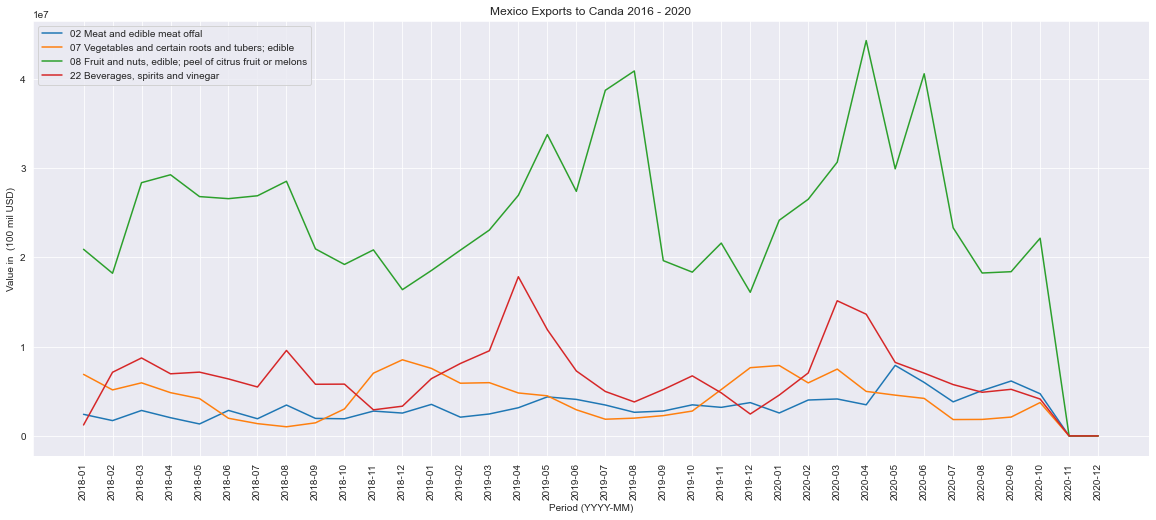

In [7]:
plot_can_mex_df =export_df['Mexico_Canada'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
can_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_mex_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Mexico Exports to Canda 2016 - 2020")

plt.show()

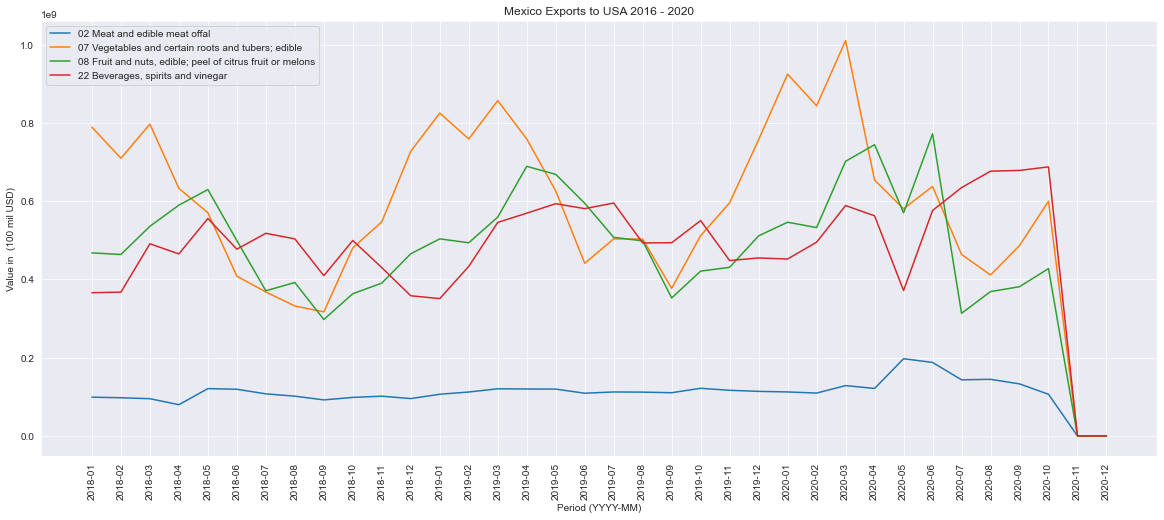

In [8]:
plot_mex_usa_df =export_df['Mexico_USA'][0].melt( 'index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
mex_usa = sns.lineplot(x= 'index', y="vals", hue='cols', data=plot_mex_usa_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Mexico Exports to USA 2016 - 2020")
plt.show()

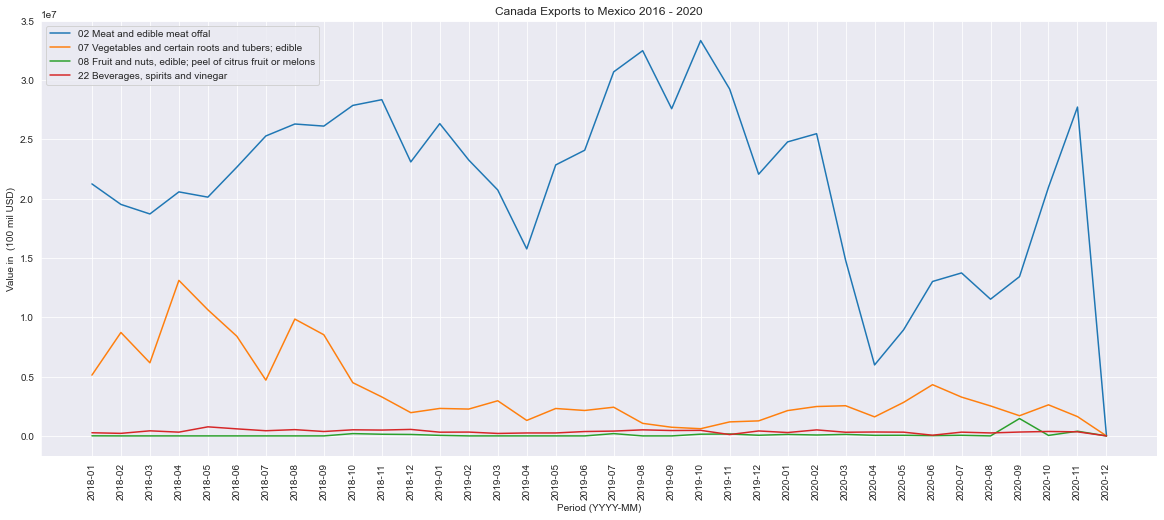

In [9]:
plot_can_mex_df =export_df['Canada_Mexico'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
can_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_mex_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Canada Exports to Mexico 2016 - 2020")
#plt.ylim(top=300000000)
plt.show()

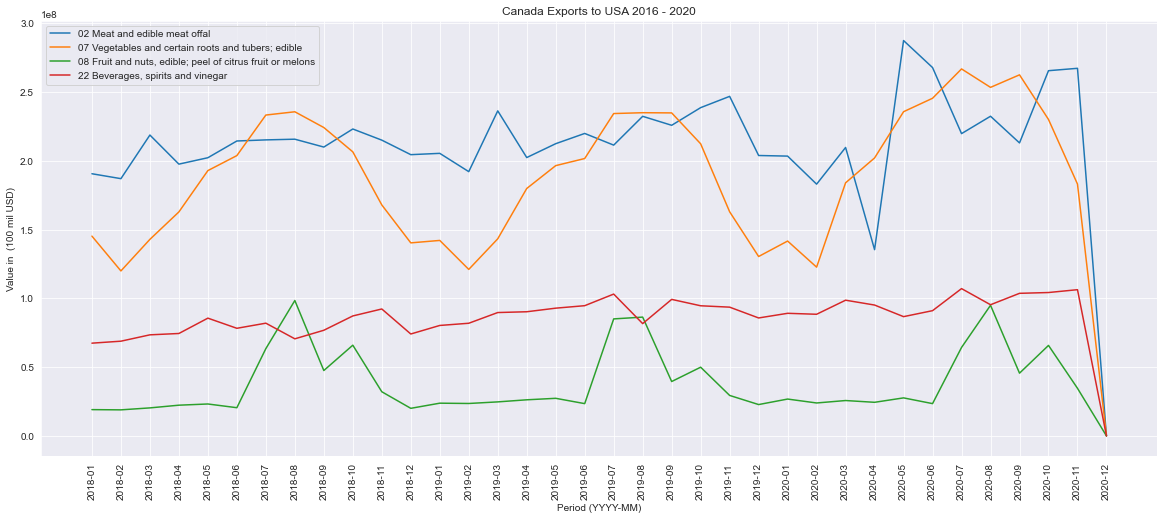

In [10]:
plot_can_usa_df =export_df['Canada_USA'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Canada Exports to USA 2016 - 2020")
can_usa = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_usa_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')

#plt.ylim(top=300000000)
plt.show()

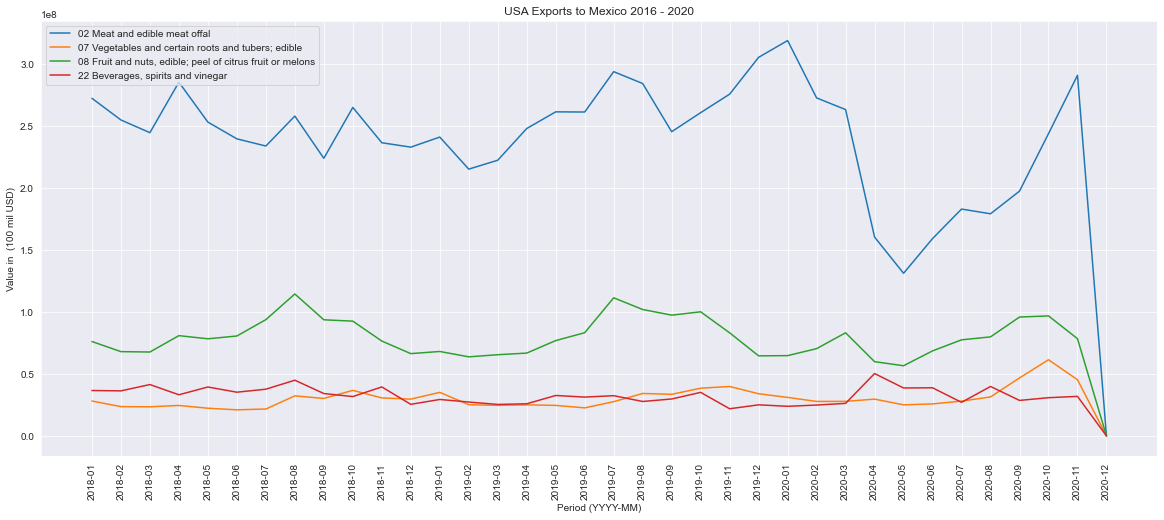

In [11]:
plot_usa_mex_df =export_df['USA_Mexico'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
usa_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_usa_mex_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"USA Exports to Mexico 2016 - 2020")
#plt.ylim(top=300000000)
plt.show()

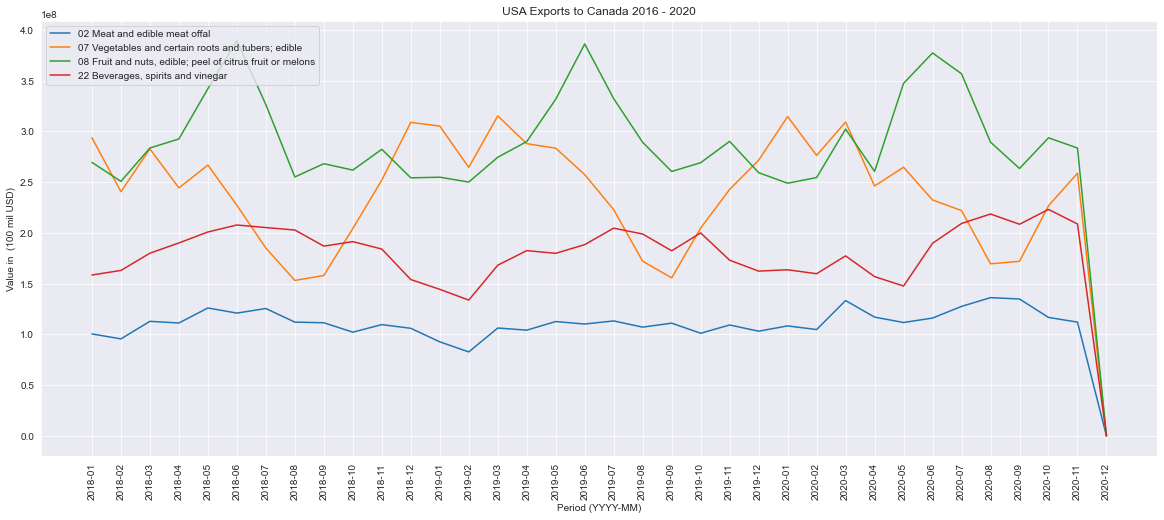

In [12]:
plot_usa_can_df =export_df['USA_Canada'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
usa_can = sns.lineplot(x="index", y="vals", hue='cols', data=plot_usa_can_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"USA Exports to Canada 2016 - 2020")
#plt.ylim(top=300000000)
plt.show()

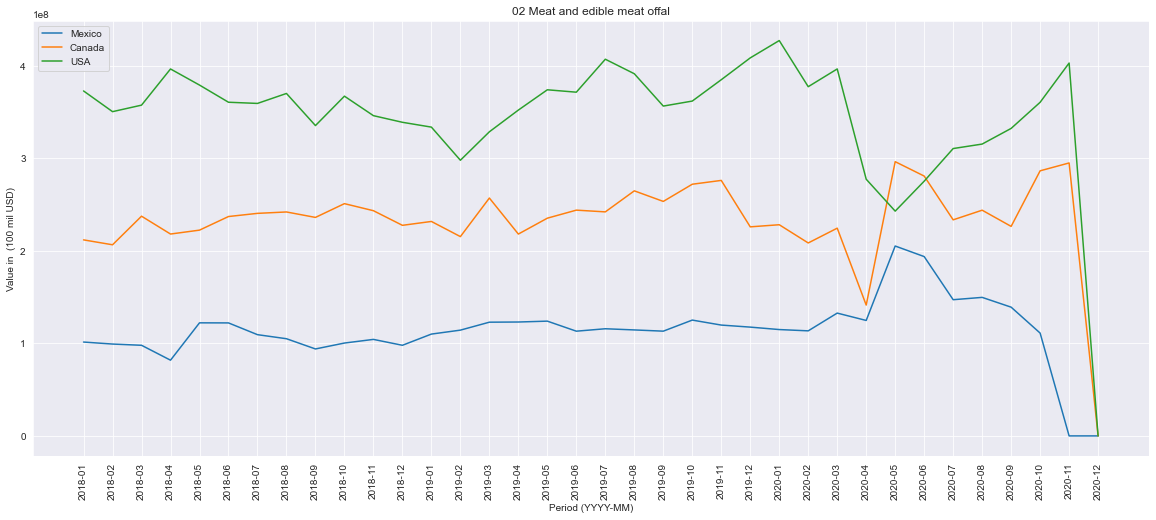

In [13]:

plot_meat =meat_exp_df.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
meat = sns.lineplot(x="index", y="vals", hue='cols', data=plot_meat)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"02 Meat and edible meat offal")
plt.show()

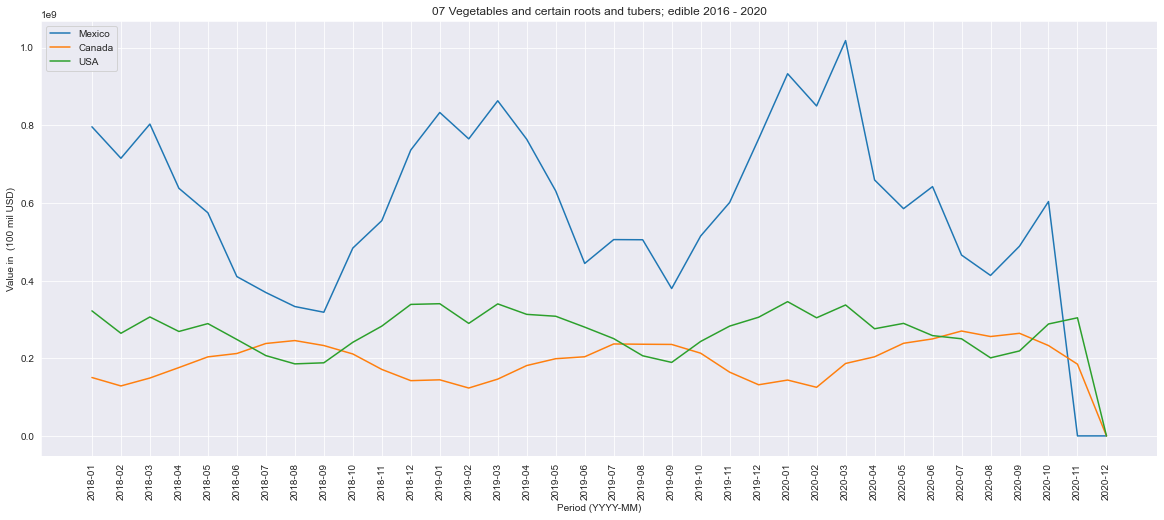

In [14]:
veg_exp_df
plot_veg =veg_exp_df.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
meat = sns.lineplot(x="index", y="vals", hue='cols', data=plot_veg)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"07 Vegetables and certain roots and tubers; edible 2016 - 2020")
plt.show()

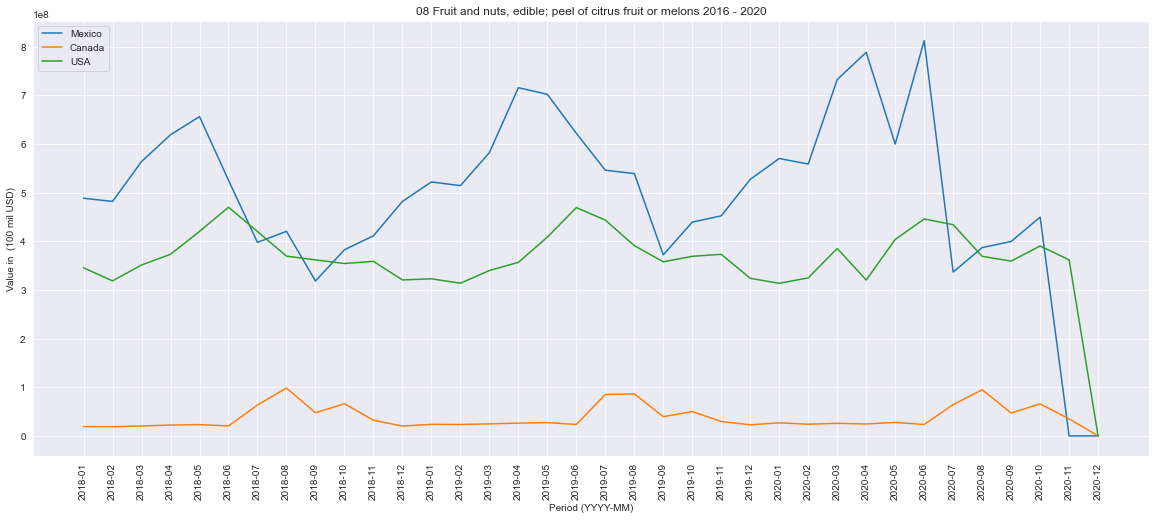

In [15]:
plot_fruit =fruit_exp_df.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
fruit = sns.lineplot(x="index", y="vals", hue='cols', data=plot_fruit)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"08 Fruit and nuts, edible; peel of citrus fruit or melons 2016 - 2020")
plt.show()

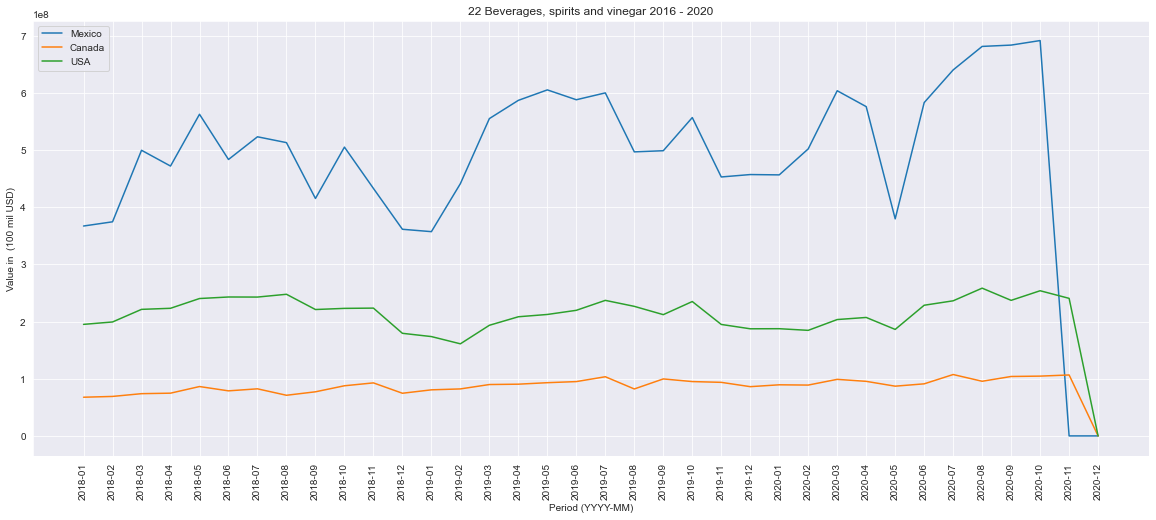

In [16]:
bev_exp_df
plot_bev =bev_exp_df.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
fruit = sns.lineplot(x="index", y="vals", hue='cols', data=plot_bev)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"22 Beverages, spirits and vinegar 2016 - 2020")
plt.show()

## Retrieve the export information from the csv file to see the behavior of all North America exports to the rest of the world. The data is group by Date, format year & month.

In [17]:
clean_exp_df=exp_df.loc[(exp_df['Reporter']!=exp_df['Partner']),:].reset_index(drop=True)
e_wrld_df=clean_exp_df.loc[(clean_exp_df['Partner']=='World') & (clean_exp_df['Commodity']=='TOTAL Total of all HS commodities'),:].reset_index(drop=True).transpose(copy=True)
e_wrld_df.reset_index(inplace=True)
e_wrld_df.drop([0,1,2,3,4],inplace=True)

e_wrld_df.columns =['Period', 'Canada', 'Mexico', 'USA']
e_wrld_df['Year']=e_wrld_df['Period'].str.slice(0,4)
e_wrld_df['Month']=e_wrld_df['Period'].str.slice(5,7)
e_wrld_df['Date']=e_wrld_df['Year'] + e_wrld_df['Month']
e_wrld_df2 = e_wrld_df.drop(['Period','Year','Month'], axis=1)

e_wrld_df2['Canada'] = e_wrld_df2['Canada'].fillna(0.0)
e_wrld_df2['Mexico'] = e_wrld_df2['Mexico'].fillna(0.0)
e_wrld_df2['USA'] = e_wrld_df2['USA'].fillna(0.0)

e_wrld_df2.replace(',','', regex=True, inplace=True)

e_wrld_df2['Date'] = e_wrld_df2['Date'].astype('int')
e_wrld_df2['Canada'] = e_wrld_df2['Canada'].astype('float')
e_wrld_df2['Mexico'] = e_wrld_df2['Mexico'].astype('float')
e_wrld_df2['USA'] = e_wrld_df2['USA'].astype('float')

e_wrld_df2 = e_wrld_df2.loc[(e_wrld_df2['Date']>201712) & (e_wrld_df2['Date']<202011)]. reset_index(drop=True)
e_wrld_df2['Date'] = e_wrld_df2['Date'].astype('str')

e_t_wrld_df = e_wrld_df2.groupby(['Date'])[['Canada', 'Mexico', 'USA']].sum().reset_index()

## Draw the graphic to see the behavior during the last three years.

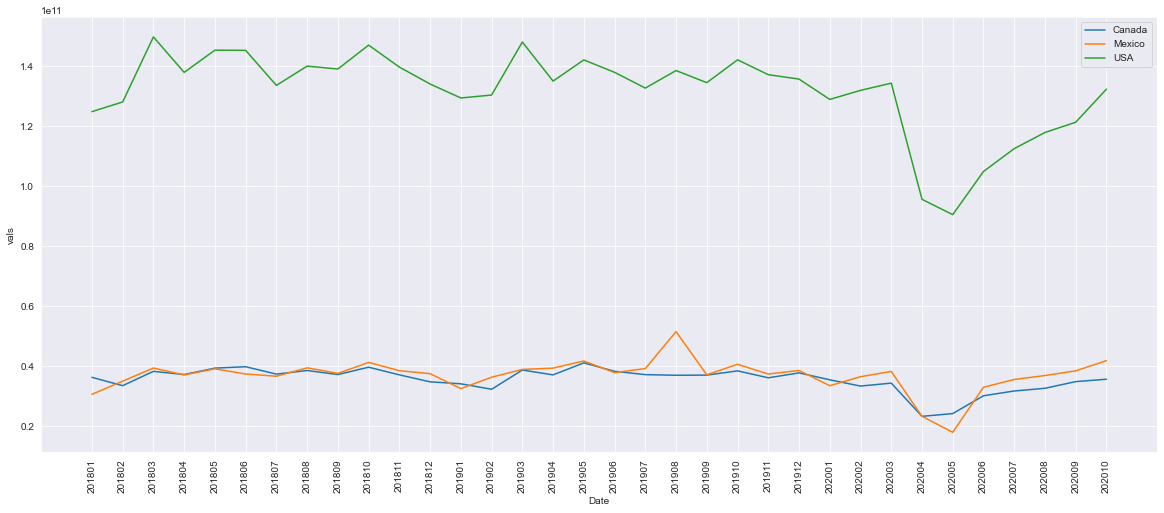

In [18]:
plot_df = e_t_wrld_df.melt('Date', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
g = sns.lineplot(x="Date", y="vals", hue='cols', data=plot_df)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')

plt.show()


## Retrieve the data information of Covid Confirmed Cases for North America.

In [19]:
file = 'covid_data.csv'
cov_df = pd.read_csv(file, encoding="ISO-8859-1")

cln_cov_df = cov_df.drop(['Province/State','Last Update','SNo','Deaths','Recovered'],axis=1)
date = cln_cov_df['ObservationDate'].str.split(pat="/", expand = True)
cln_cov_df['Month'] = date[0]
cln_cov_df['Year'] = date[2]
m = (cln_cov_df['Country/Region'] == 'Mexico') | (cln_cov_df['Country/Region'] == 'US') | (cln_cov_df['Country/Region'] == 'Canada')
cln_cov_df2 = cln_cov_df.loc[m,:]
na_cov_df = cln_cov_df2.groupby(['Year','Month'])[['Confirmed']].sum().reset_index()
na_cov_df["Date"] = na_cov_df['Year'] + na_cov_df['Month']
na_cov_df2 = na_cov_df.drop(['Year', 'Month'],axis=1)

cov_econ_wrld = e_t_wrld_df.join(na_cov_df2.set_index('Date'), on='Date')

## With the information of COVID merge the graphic with the previous generated for North America exports.

<ipython-input-20-10462b64bd70>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax.get_yticks().tolist()])
<ipython-input-20-10462b64bd70>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax2.get_yticks().tolist()])


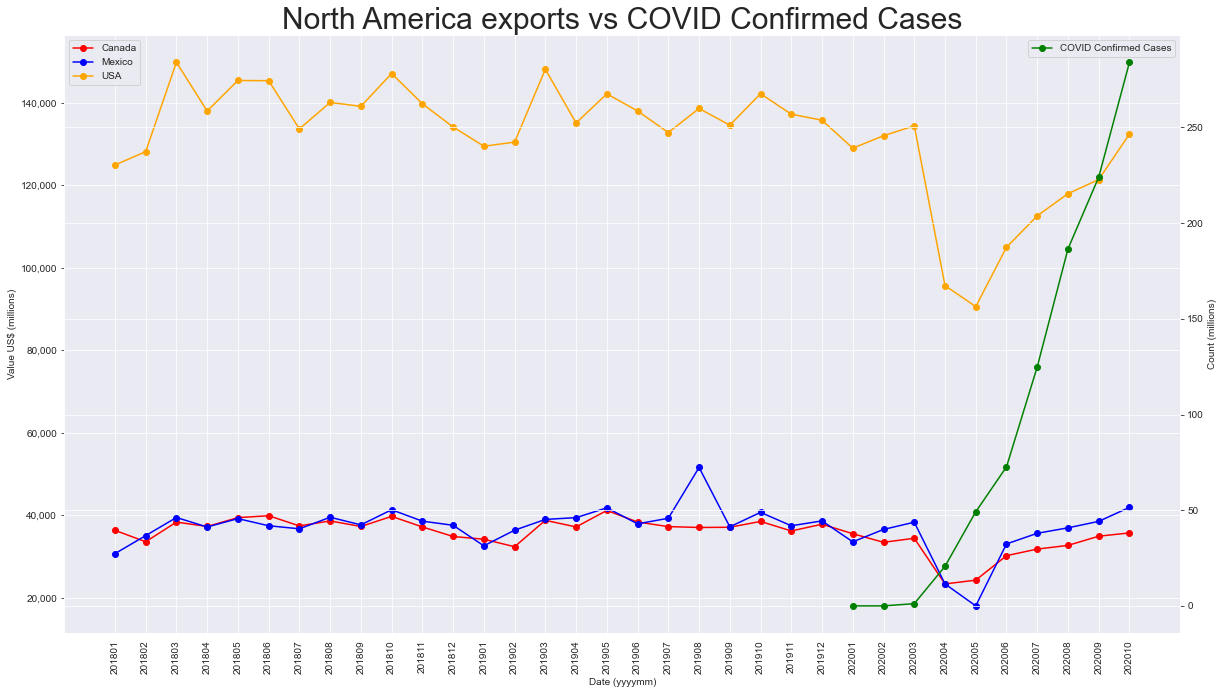

In [20]:
fig, ax= plt.subplots()
ax.plot(cov_econ_wrld.Date, cov_econ_wrld.Canada, color="red", marker="o", label="Canada")
ax.plot(cov_econ_wrld.Date, cov_econ_wrld.Mexico, color="blue", marker="o", label="Mexico")
ax.plot(cov_econ_wrld.Date, cov_econ_wrld.USA, color="orange", marker="o", label="USA")
ax2=ax.twinx()
ax2.plot(cov_econ_wrld.Date, cov_econ_wrld.Confirmed, color="green", marker="o", label="COVID Confirmed Cases")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
leg = ax.legend(loc='upper left')
leg2 = ax2.legend()
ax.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax.get_yticks().tolist()])
ax2.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax2.get_yticks().tolist()])
ax.set_title('North America exports vs COVID Confirmed Cases', fontsize=30)
ax.set_xlabel('Date (yyyymm)')
ax.set_ylabel('Value US$ (millions)')
ax2.set_ylabel('Count (millions)')
fig.set_size_inches(20,11)
plt.savefig('exp_vs_covid.png', dpi=100)
plt.show()